# **SIE MÜSSEN WIEDER DIE NEUESTE ML-LIB VERWENDEN**

Diese hier zur Testierung vorgelegte Lösung wurde durch
folgendes Team erarbeitet:

Erklärung:
Diese hier zur Testierung vorgelegte Lösung wurde durch folgendes Team
erarbeitet:

Studierender 1: Pana, Christian | 11117043

Studierender 2: Pooth, Matthias | 11124943

Jeder der oben genannten Studierenden erklärt hiermit folgendes:
- Die abgegebene Ausarbeitung habe ich (Name des Studierenden) zusammen
 mit dem oben genannten Teampartner eigenständig auf Basis der von der
 TH-Köln bereitgestellten Vorlagen (Softwarerahmen) erarbeitet.
- Ich bin in der Lage diese meine Ausarbeitung auf Nachfrage eigenständig zu
 erläutern und notwendige Änderungen, die sich auf Basis einer leicht geänderten
 Aufgabenstellung ergeben, zu skizzieren.
<-##














In [1]:
# Einbinden des eigenen Google-Drive
## - CLM auf den erscheinenden Link
# - Google-Koto auswaehlen
# - Die Verwendung zulassen (ggf. ganz nach unten scrollen)
# - Den angezeigten authorization code in die Zwischenablage kopieren
# - Zurueck zu dieser Seite und den authorization cade in die umrandete Box aus der Zwischenablage einfuegen
# - Die Eingabe mit RETURN abschliessen
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Definition des Basis-Verzeichnisses
# Dieses wird hier so festgelegt, dass man im Google-Drive unter 
#     /Colab_Drive/ML_TH/
# arbeitet. Das BASEDIR MUSS BEREITS EXISTIEREN, also von Hand angelegt worden sein.
BASEDIR='/content/drive/My Drive/Colab_Drive/ML_TH/'

# Weitere vorausgesetzte Verzeichnisse anlegen
import os
if os.path.exists(BASEDIR + 'Data_Input'):
  print("Das Verzeichnis  "+BASEDIR+'Data_Input'+"   existiert bereits")
else:
  os.mkdir(BASEDIR + 'Data_Input')

if os.path.exists(BASEDIR + 'Temp'):
  print("Das Verzeichnis  "+BASEDIR+'Temp'+"   existiert bereits")
else:
  os.mkdir(BASEDIR + 'Temp')

# Die ML-Lib importieren. Diese muss im zuvor definierten BASEDIR stehen
import os
os.chdir(BASEDIR)
import ML_Lib as ml
if ml.vers() < 0.92 :
  print("##########  DIE ML-LIB IST GGF. ZU ALT ###############")
  print(ml.vers())

Das Verzeichnis  /content/drive/My Drive/Colab_Drive/ML_TH/Data_Input   existiert bereits
Das Verzeichnis  /content/drive/My Drive/Colab_Drive/ML_TH/Temp   existiert bereits


In [3]:
# Alle weiteren immer verwendeten Libs importieren
import numpy as np
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt

# Steuerparameter für die Kapitel dieses Notebooks

ACHTUNG: Nach der Änderung der Parameter muss die Code-Zelle auch IMMER AUSGEFÜHRT WERDEN !!!

In [4]:
DATEN_HANDLING = True #@param ["False", "True"] {type:"raw"}


ERSTES_EINFACHES_CNN = False #@param ["False", "True"] {type:"raw"}

ZWEITES_EINFACHES_CNN = False #@param ["False", "True"] {type:"raw"}


CODE_FUER_AUFGABE_2_3_4 = False #@param ["False", "True"] {type:"raw"}

CODE_FUER_AUFGABE_5 = True #@param ["False", "True"] {type:"raw"}

SPEICHERN = True #@param ["False", "True"] {type:"raw"}

In [5]:
import keras as keras
from keras import models
from keras import layers  
from keras import optimizers
from keras import losses
from keras import metrics
from keras import activations
from keras import Input

from tensorflow.keras import initializers
from keras import utils               # Hiervon wird to_categorical() benötigt        

# Fuer das Handling von Bildern
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array

# Handlig der Daten

###Bilder laden
ACHTUNG: Die Daten werden direkt von einem Server geladen.
Diese Server ist schon mal kurzfristig überlastet.<br>
**Falls also hier ein Fehler auftritt dann diese Zelle "einfach noch mal ausführen ... bis es klappt".**

In [6]:
if (DATEN_HANDLING == True):
  from keras.datasets import cifar10    

  # Laden der Bild-Daten von Keras-Webseite
  (X_train_all, y_train_all_label), (X_test_all, y_test_all_label) = cifar10.load_data()

###Bilder selektieren


In [7]:
if (DATEN_HANDLING == True):
  # Eine kleine Funktion mit der man jeweils 3 Klassen aus dem gelableten Datensatz
  # extrahieren und auch direkt one-hot-kodieren kann.

  def select_three_classes(X_all, y_all_label, label_1, label_2, label_3):
    
    ###### Trainingsdaten selektieren und konvertieren ###########
    anz_bilder, size_x, size_y, channels = X_all.shape

    # Zaehlen wieviele Bilder bei der Auswahl von Hund, Katze und Pferd uebrig bleiben
    anzahl_selektierter_bilder = 0
    for i in range (anz_bilder) :
      if y_all_label[i] == label_1 or y_all_label[i] == label_2 or y_all_label[i] == label_3:
        anzahl_selektierter_bilder = anzahl_selektierter_bilder +1

    # Die Felder fuer die Selektion anlegen
    X = np.zeros((anzahl_selektierter_bilder, size_x, size_y, channels),dtype=np.int16)
    y_label = np.zeros((anzahl_selektierter_bilder, 1))


    # Nun die Bilder in die fuer die Selektion angelegte Felder kopieren
    j=0
    for i in range (anz_bilder) :
      if y_all_label[i] == label_1 or y_all_label[i] == label_2 or y_all_label[i] == label_3: # Selektion
        X[j,:,:] = X_all[i,:,:]
        y_label[j] = y_all_label[i]
        j = j +1

    # Die One-Hot-Kodierung durchfuehren
    y = np.full((anzahl_selektierter_bilder,3), 0)
    for i in range(y_label.shape[0]):
        if y_label[i] == label_1 :
          y[i] = [1.0,0.0,0.0]
        elif y_label[i] == label_2:
          y[i] = [0.0,1.0,0.0]
        elif y_label[i] == label_3:
          y[i] = [0.0,0.0,1.0]

    return X, y, y_label # Daten, One-Hot-Kodierungen, Labels


In [8]:
if (DATEN_HANDLING == True):
  # Aus den gesamten Daten nur die Daten von 3 Klassen extrahieren
  # Die Label fuer die Klassen sind gemaess Cifar10 wie folgt:
  Flugzeug  =   0
  PKW       =   1
  Vogel     =   2
  Katze     =   3
  Rotwild   =   4
  Hund      =   5
  Frosch    =   6
  Pferd     =   7
  Boot      =   8
  LKW       =   9


 
  # "Vogel", "Rotwild", "Frosch"
  X_train, y_train, y_train_label  = select_three_classes(X_train_all, y_train_all_label, Vogel, Rotwild, Frosch) 
  X_test, y_test, y_test_label  = select_three_classes(X_test_all, y_test_all_label, Vogel, Rotwild, Frosch) 

  # Wir moechten nur Bilder von Hunden, Katzen und Pferden klassifizieren.     
  # Entsprechend wird extrahiert
  # "Hund", "Katze", "Pferd"
  #X_train, y_train, y_train_label  = select_three_classes(X_train_all, y_train_all_label, Hund, Katze, Pferd) 
  #X_test, y_test, y_test_label  = select_three_classes(X_test_all, y_test_all_label, Hund, Katze, Pferd) 

### Bilder betrachten 

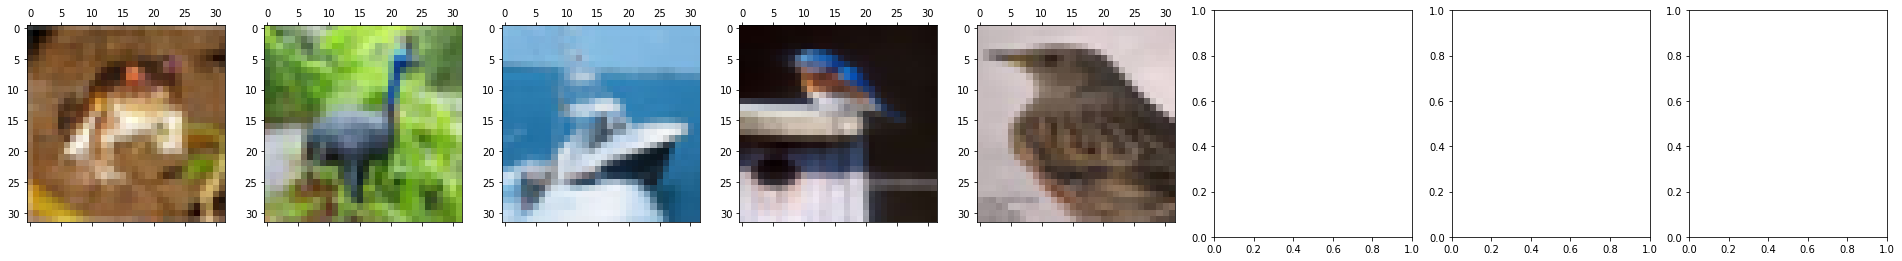

In [9]:
if (DATEN_HANDLING == True):
  # Subset der Bilder bestimmen die ausgegeben werden sollen
  X_p = X_train[0:5]

  # Testweise die Bilgroesse in horizotalen und/oder vertikaler Richtung vergroessern
  X = X_p + 0 # Sicherheirshalber eine tiefe Kopie erzeugen
  X = np.repeat(X, 1, axis=1)   # horizontale Richtung, also Spalten verdoppeln
  X = np.repeat(X, 1, axis=2)   # vertikale Richtung, also Zeilen verdoppeln

  # Bilder darstellen
  # Die Signatur der dafuer bereitgestellten Funktion ist wie folgt:
  #
  #     show_images(imgs_to_show, anzahl_kachelspalten, gesamtplotbreite_in_pixel=2400, hide_axes=False)
  #
  #       imgs_to_show:               Matrix mit den Bilddaten. Diese Matrix hat folgenden Aufbau:   
  #                                   shape (Anzahl_Bilder, Anzahl_Zeilen , Anzahl_Spalten, Anzahl_Farbkanaele)
  #       anzahl_kachelspalten:       Gibt an wieviele Bilder nebeneinander dargestellt werden sollen.
  #       gesamtplotbreite_in_pixel:  Breite des Platzes der im Plot fuer die Darstellung bereit gestellt wird.
  #                                   Mit einem Wert von 2400 Pixeln ist man in der Regel etwas breiter als der
  #                                   Monitor. Dies ist nicht kritisch, denn matplot skaliert den Gesamtplot dann
  #                                   auf den zur Verfuegung stehenden Platz herunter, jedoch nicht herauf.
  #       hide_axes=False:            True => Die Koordinatenachsen werden mit ausgegeben. 
  #
  # Der typische Aufruf mit den nicht anzugebenden Defaultwerten ist dann wie folgt:
  #     show_images(Bild-Matrix, Anzahl_Bilder_die_nebeneinander_dargestellt_werden_sollen) 

  ml.show_images(X, 8)

### Bilder normieren.

In [10]:
if (DATEN_HANDLING == True):
  # Normieren der Bilder. Konvertiere nach float und normiere danach auf den Wertebereich 0 bis 1
  X_train_norm = X_train.astype('float32') / 255.0
  X_test_norm = X_test.astype('float32') / 255.0

# Ein erstes einfaches CNN 

### Erstellen, trainieren und evaluieren

Dieses CNN besteht aus 2 Convolutional-Layern gefolt von einem Hidden-Dense-Layer und einem Output-Dense-Layer.

Die Erstellung erfolgt so wie bisher auch in 4 Schritten.<br>
>1.) Definition<br>
>2.) Compilieren<br>
>3.) Trainieren<br>
>4.) Evaluierung<br>

In [11]:
if (ERSTES_EINFACHES_CNN == True):
  ##################################################################################################
  #                     1.)  Definition des Netzwerkes mittels Functional-API
  ##################################################################################################
    


  input_layer = Input (shape=(32, 32, 3))   # Input des Teilnetzes ist ein Bild 
                                            # mit 32 Zeile, 32 Spalten und 3 Byte je RGB-Pixel 

  # Alle hier aufgefuehrten Parameter sind im Skript erklaert. Die verwendten Namen sind "selbsterklaerend"
  ANZAHL_KERNELS         =   32                # Besser Neuronen pro Bildpunkt also ANZAHL_KERNELS
  ACTIVATION_FUNCTION     =   activations.relu
  KERNEL_ANZAHL_SPALTEN   =   32
  KERNEL_ANZAHL_ZEILEN    =   32
  STRIDE_HORIZONTAL       =   1
  STRIDE_VERTICAL         =   1
  DILATE_HORIZONTAL       =   1
  DILATE_VERTICAL         =   1

  # Wir wollen Bilder also zweidimensionale Gebilde verarbeiten. Dafuer bietet Keras einen 2D-Convolution-Layer an
  # Es gibt auch noch 1D- und 3D-Convolutio-Layer (1D z.B. fuer Audiosignale, 3D-Fuer Bildsequnezen also Videos)
  conv_1 = layers.Conv2D       ( 
                                    ANZAHL_KERNELS,                 
                                    (KERNEL_ANZAHL_ZEILEN, KERNEL_ANZAHL_SPALTEN), 
                                    strides=(STRIDE_HORIZONTAL, STRIDE_HORIZONTAL),       
                                    activation=ACTIVATION_FUNCTION,   
                                    padding='same',                                 # padding = "valid"   => kein Padding, d.h. die Bilder werden wegen der "Faltungsraender" immer kleiner
                                                                                    # padding = "same"    => Output hat die selbe Groesse wie Input. Bildraender werden schwarz
                              
                                    dilation_rate=(DILATE_HORIZONTAL, DILATE_VERTICAL),
                                    #kernel_initializer=initializers.glorot_uniform,    # Optionaler Initialisierer fuer die Gewichte, 
                                                                                        # so wie schon von Dense-Layer her bekannt.
                                    #bias_initializer=initializers.zeros                # Optionaler Initialisierung der Bias-Gewichte
                                                                                        # so wie schon von Dense-Layer her bekannt.
                              
                                  )                         ( input_layer )



  # Einen Max-Pooling-Layer einfuegen
  # Dafuer stellt Keras einen entsprechenden Layer bereit.
  KACHEL_ANZAHL_SPALTEN   =   3
  KACHEL_ANZAHL_ZEILEN    =   3
  STRIDE_HORIZONTAL       =   3
  STRIDE_VERTICAL         =   3

  # ACHTUNG: Als Default-Werte, also wenn keine Werte explizit angegeben werden, gilt:
  #               - Der Stride wird so gewaehlt dass die Kacheln wie echte Kacheln direkt nebeneinander liegen
  #               - Die Bilder werden kleiner (padding="valid")
  # D.h. ein typischer kuerzerer Aufruf ware wie folgt:
  #     v1_maxpool = layers.MaxPool2D   (  (KACHELGROESSE_HORIZONTAL, KACHELGROESSE_VERTICAL),                                    
  #                                     )                         ( v1_conv_2 ) 

  maxpool_1 = layers.MaxPool2D   (  
                                      (KACHEL_ANZAHL_ZEILEN, KACHEL_ANZAHL_SPALTEN),
                                      strides=(STRIDE_HORIZONTAL,STRIDE_VERTICAL), 
                                      padding="valid",        # padding = "valid"   => kein Padding, d.h. die Bilder werden kleiner
                                    )                         ( conv_1 )

  #######################################################################################
  #                       Ein Sub-Net definieren
  #######################################################################################
  # Ab hier koennten wir nun die weiteren Schichten so wie aus dem  Versuch 2 
  # bekannt definieren.
  #
  # Damit Sie dennoch etwas dazu lernen koennen, wollen wir dies unter Verwendung eines
  # sogenannten Sub-Net machen. Ein Sub-Net kappselt mehrere Layer und kann
  # bei der Netzwerkdefinition wie ein "normaler" Layer gehandhabt werden.
  # 
  # Im Folgenden werden den oben schon aufgefuehrte Flatten-Layer  und den
  # Dense-Layer zu einem Sub-Net "hidden_layers_classification" zusammen gefasst.


  # Wie bei einem Gesamtnetz so muss auch bei einem Sub-Net der Input (dessen Groesse)
  # definiert werden denn typischerweise ist die Groesse des Inputvektors nicht bekannt. 
  input_sub_net = Input (shape=(32//KACHEL_ANZAHL_ZEILEN, 32//KACHEL_ANZAHL_SPALTEN, ANZAHL_KERNELS ))  # Die Bilder sind 32x32 gross und wurden z.B. mit 2x2 gepoolt (Kachelgroesse 2x2)
    
                                                                                                      # Daraus ergibt sich eine Groesse einer Activation-Map von 16x16 
                                                                                                        # Wurden oben z.B. 32 Kernels definiert, so erhalten
                                                                                                        # wir 32 (ANZAHL_KERNELS) Activation-Maps

  # Der Pooling-Layer liefert 2D-Daten die Dense-Layr verlangen 1D-Daten.
  # Die 2D-Daten werden deshalb jet in 1D-Daten umformatriert. 
  # Dazu bietet Keras den Layer "Flatten" an.
  flatten = layers.Flatten    (

                              )                             ( input_sub_net )

  # Nun einen "normalen" Dense-Layer "nachschalten".
  # Dieser hat aber jetzt eine ReLu-Aktivierungsfunktion und nicht wie bisher ein sigmoide
  dense_relu_1 = layers.Dense   (       64,  
                                      activation=activations.relu,
                              )                             ( flatten )

  hidden_layers_classification = models.Model(input_sub_net, dense_relu_1)  # Die Topolgie des Sub-Net erzeugen

  #                   Hier ist die Definition des Sub-Net beendet
  #######################################################################################


  # Das soeben definierte Sub-Net kann nun wie ein "normaler" Layer bei der weiteren
  # Definition des Gesamtnetzes verwendet werden.
  sub_net_output = hidden_layers_classification (maxpool_1) 

  output_layer = layers.Dense (       3,  
                                      activation=activations.softmax
                              )                             ( sub_net_output )

  # Die Topolgie des Gesamtnetzes erzeugen
  beispiel_cnn = models.Model( input_layer, output_layer)


  ##################################################################################################
  #                                   2.)  Compilieren
  ##################################################################################################
  # Als Optimierer waehlen wir wieder den Stochastic-Gradient-Descent
  # mit einer Lernrate von 0.001.
  # Der Parameter "momentum" ist im Kapitel "Deep-Learning - Spezielle Herausforderungen und Mechanismen" 
  # beschrieben.
  OPTIMIZER = optimizers.SGD(learning_rate=0.001, momentum=0.9)

  # Da wir ein "Wahrscheinlichkeitsaussage" statt einer "Ähnlichkeitsausssage" erhalten moechten
  # waehlen wir hier nun die Cross-Entropy-Cost-Function statt des Mean-Squared-Error als "Fehlermaß" (Loss)
  LOSSES = losses.CategoricalCrossentropy()  

  # Als Metric fuer die Evaluation waehlen wir (wie gehabt) die Accuracy 
  METRIC = metrics.CategoricalAccuracy()

  # Compilierung durchfuehren
  beispiel_cnn.compile(optimizer=OPTIMIZER, loss=LOSSES, metrics=[METRIC])


  ##################################################################################################
  #                                   3.)  Trainieren
  ##################################################################################################
  # Das Training geschieht so wie bisher auch schon.
  # Die Call-Backs sind heir jedoch deaktiviert
  batch_size  = 64    # Anzahl der Eingabevektoren je Mini-Batch
  max_epochs  = 60    # Anzahl der Epochen, die Trainiert werden soll

  history = beispiel_cnn.fit(X_train_norm,                    # Eingabedaten  
                          y_train,                        # Ausagbedaten
                          epochs=max_epochs,              # Anzahl Epochen die trainiert werden soll
                          batch_size=batch_size,          # Batch-Size
                          #callbacks=[CustomCallback()],  # Angabe der Funktion, die nach jeder Epoche einmal aufgerufen wird
                          verbose=1,                      # Anzeige des Fortschrittsbalkens "====" je Eboche
                          validation_data=(X_test_norm, y_test) # Angabe der Validierunsgdaten
                                                                # Die validierung wird automatisch nach jeder Epoche durchgefuehrt
                          )
    
  ##################################################################################################
  #                                   4.)  Evaluieren
  ##################################################################################################
  print(history.history.keys())     # Zeigt alle aufgezeichneten Datenkategorien an
                                    # Dies ist hilfreich um sehen zu koennen mit welchen Schluesselworten
                                    # (hier z.B. 'val_mean_squared_error' ) man das 
                                    # plt.plot(history.history[Schluesselwort]) "fuettern kann"

  # Anzeigen des Verlaufes des MSE auf den Validierungsdaten. In diesem Fall das Selbe wie der Loss Verlauf:
  plt.plot(history.history["val_loss"], label="val_CEC")
  plt.plot(history.history["loss"], label="train_CEC")
  plt.plot(history.history["val_categorical_accuracy"], label="val_accuracy")
  plt.plot(history.history["categorical_accuracy"], label="train_accuracy")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.title('Verlauf MSE')
  plt.legend(loc='upper left')
  plt.show() 


### Die Topologie des Netzes anzeigen
Für diesen Zweck stellt Keras eine sehr schöne Funktion zur Verfügung. Diese listet die Layer und deren Grössen auf aber leider nicht die verwendeten Aktivierungsfunktionen oder andere ggf. noch interessante "Eckwerte".<br><br>
Die **Nummerierung der Layer beginnt ganz oben mit 0** und wird von da aus einfach hochgezählt.<br><br>
Im Rahmen der Entwicklung lohnt es sich diese Information auch "zwischendurch" abzurufen. Z.B. wäre diese Info für die Definition des Sub-Net hilfreich gewesen. Hierzu wäre mann dann wie folgt vorgegangen:<br>
>1.) Definition des Gesamtnetzes ohne dabei Sub-Netze zu defiren.<br>
>2.) Sichtung der Topologie das Gesamtnetzes und Entscheidung aus welchen Layern man Sub-Netze definieren möchte.<br>
>3.) Unter Beachtung der Informationen in der dargetellten Topologie die Inputs für die Sub-Nets definieren.



In [12]:
if (ERSTES_EINFACHES_CNN == True):
  print("########################################################")
  print("# Topologie des Sub-Net: hidden_layers_classification  #")
  print("########################################################")
  hidden_layers_classification.summary()

  print("########################################################")
  print("#              Topologie des Gesamtnetzes              #")
  print("########################################################")          
  beispiel_cnn.summary() # Die Tolologie des Gesamtnetzes darstellen

### Die Activation-Maps darstellen
Dies ist in der Praxis sehr unüblich, wird heir aber trotzdem gemacht, damit man einmal eine grobe Vorstellung davon entwickelt wie die CNN-Layer arbeiten.

In [13]:
if (ERSTES_EINFACHES_CNN == True):
  # Parameter fuer die Anzeige
  MATRIX_MIT_BILDERN        = X_train
  MATRIX_MIT_NETZWERK_INPUT = X_train_norm  # ACHTUNG: Die Bilder wurden zum Training normiert !!!
  Netzwerk                  = beispiel_cnn  # Netzwerk das untersucht wird.
  LAYER_NUMMER              = 2             # Layer 2 ist gemaess obiger Netzwerkdarstellung der Max-Pooling-Layer
  BILD_NUMMER               = 3             # Es wird das 3. Bild im Datensatz genommen
  BILDER_PRO_REIHE          = 16             # Es werden jeweils 8 Bilder (Activation-Maps) nebeneinander dargestellt

  # Zeige das Bild an zu dem die Activation-Maps berechnet wurden.
  # Die Anzeige erfolgt (wegen Verwendung von BILDER_PRO_REIHE in beiden Aufrufen) in der Groesse mit der
  # auch die Activation-Maps dargestellt werden.
  ml.show_images( MATRIX_MIT_BILDERN [BILD_NUMMER  : (BILD_NUMMER +1)], BILDER_PRO_REIHE)
  # Zeige die Aczivation-Maps an
  ml.show_activation_maps_of_one_2D_cnn_layer(Netzwerk, LAYER_NUMMER, MATRIX_MIT_NETZWERK_INPUT, BILD_NUMMER, BILDER_PRO_REIHE )


### Das trainierte Netz und das Sub-Netz "hidden_layers_classification" abspeichern

In [14]:
if (ERSTES_EINFACHES_CNN == True):
  # Das Gesamt-Netz speichern. 
  SPEICHERN = True
  if SPEICHERN == True:
    with open(BASEDIR + '/Temp/' + 'beispiel_cnn.json', "w") as json_file:
        json_file.write(    beispiel_cnn.to_json()       )

    # Die Werte der Gewichte speichern.
    beispiel_cnn.save_weights(BASEDIR + '/Temp/' + 'beispiel_cnn.h5')


  # Ein Sub-Net kann so wie ein Gesamtnetz abgespeichert werden.
  if SPEICHERN == True:
    with open(BASEDIR + '/Temp/' + 'hidden_layers_classification.json', "w") as json_file:
        json_file.write(    hidden_layers_classification.to_json()       )

    # Die Werte der Gewichte speichern.
    hidden_layers_classification.save_weights(BASEDIR + '/Temp/' + 'hidden_layers_classification.h5')

# Ein zweite einfaches CNN auf Basis eines gespeicherten Sub-Net 

### Erstellen, trainieren und evaluieren

Dieses CNN besteht aus 2 Convolutional-Layern gefolt von dem zuvor gespeicherten Sub-Net und einem Output-Dense-Layer.

Die Erstellung erfolgt so wie bisher auch.

In [15]:
if (ZWEITES_EINFACHES_CNN == True):
  ##################################################################################################
  #            1a.)  Die CNN-Layer wie oben auch definieren
  ##################################################################################################
  
  input_layer = Input (shape=(32, 32, 3))   # Input des Teilnetzes ist ein Bild 
                                            # mit 32 Zeile, 32 Spalten und 3 Byte je RGB-Pixel 

  # Alle hier aufgefuehrten Parameter sind im Skript erklaert. Die verwendten Namen sind "selbsterklaerend"
  ANZAHL_KERNELS         =   32                # Besser Neuronen pro Bildpunkt also ANZAHL_KERNELS
  ACTIVATION_FUNCTION     =   activations.relu
  KERNEL_ANZAHL_SPALTEN   =   32
  KERNEL_ANZAHL_ZEILEN    =   32
  STRIDE_HORIZONTAL       =   1
  STRIDE_VERTICAL         =   1
  DILATE_HORIZONTAL       =   1
  DILATE_VERTICAL         =   1

  # Wir wollen Bilder also zweidimensionale Gebilde verarbeiten. Dafuer bietet Keras einen 2D-Convolution-Layer an
  # Es gibt auch noch 1D- und 3D-Convolutio-Layer (1D z.B. fuer Audiosignale, 3D-Fuer Bildsequnezen also Videos)
  conv_1 = layers.Conv2D       ( 
                                    ANZAHL_KERNELS,                 
                                    (KERNEL_ANZAHL_ZEILEN, KERNEL_ANZAHL_SPALTEN), 
                                    strides=(STRIDE_HORIZONTAL, STRIDE_HORIZONTAL),       
                                    activation=ACTIVATION_FUNCTION,   
                                    padding='same',                                 # padding = "valid"   => kein Padding, d.h. die Bilder werden wegen der "Faltungsraender" immer kleiner
                                                                                    # padding = "same"    => Output hat die selbe Groesse wie Input. Bildraender werden schwarz
                              
                                    dilation_rate=(DILATE_HORIZONTAL, DILATE_VERTICAL),
                                    #kernel_initializer=initializers.glorot_uniform,    # Optionaler Initialisierer fuer die Gewichte, 
                                                                                        # so wie schon von Dense-Layer her bekannt.
                                    #bias_initializer=initializers.zeros                # Optionaler Initialisierung der Bias-Gewichte
                                                                                        # so wie schon von Dense-Layer her bekannt.
                              
                                  )                         ( input_layer )



  # Einen Max-Pooling-Layer einfuegen
  # Dafuer stellt Keras einen entsprechenden Layer bereit.
  KACHEL_ANZAHL_SPALTEN   =   2
  KACHEL_ANZAHL_ZEILEN    =   2
  STRIDE_HORIZONTAL       =   2 
  STRIDE_VERTICAL         =   2

  # ACHTUNG: Als Default-Werte, also wenn keine Werte explizit angegeben werden, gilt:
  #               - Der Stride wird so gewaehlt dass die Kacheln wie echte Kacheln direkt nebeneinander liegen
  #               - Die Bilder werden kleiner (padding="valid")
  # D.h. ein typischer kuerzerer Aufruf ware wie folgt:
  #     v1_maxpool = layers.MaxPool2D   (  (KACHELGROESSE_HORIZONTAL, KACHELGROESSE_VERTICAL),                                    
  #                                     )                         ( v1_conv_2 ) 

  maxpool_1 = layers.MaxPool2D   (  
                                      (KACHEL_ANZAHL_ZEILEN, KACHEL_ANZAHL_SPALTEN),
                                      strides=(STRIDE_HORIZONTAL,STRIDE_VERTICAL), 
                                      padding="valid",        # padding = "valid"   => kein Padding, d.h. die Bilder werden kleiner
                                    )                         ( conv_1 )



  ##################################################################################################
  #                          1b.)  Das trainierte Sub-Net laden
  ##################################################################################################
  # Die Netzwerktopology laden
  json_file = open(BASEDIR + '/Temp/' + 'hidden_layers_classification.json', "r")
  loaded_hidden_layers_classification = models.model_from_json(json_file.read())
  json_file.close()

  # Die Werte der Gewichte laden
  loaded_hidden_layers_classification.load_weights(BASEDIR + '/Temp/' + 'hidden_layers_classification.h5')



  ##################################################################################################
  #                       1c.)  Den Rest des Netzes definieren
  ##################################################################################################
  # Das soeben geladene Sub-Net kann nun wie ein "normaler" Layer bei der weiteren
  # Definition des Gesamtnetzes verwendet werden.
  sub_net_output = loaded_hidden_layers_classification (maxpool_1) 

  output_layer = layers.Dense (       3,  
                                      activation=activations.softmax
                              )                             ( sub_net_output )

  # Die Topolgie des Gesamtnetzes erzeugen
  beispiel_cnn_2 = models.Model( input_layer, output_layer)


  ##################################################################################################
  #                                   2.)  Compilieren
  ##################################################################################################
  # Als Optimierer waehlen wir wieder den Stochastic-Gradient-Descent
  # mit einer Lernrate von 0.001.
  # Der Parameter "momentum" ist im Kapitel "Deep-Learning - Spezielle Herausforderungen und Mechanismen" 
  # beschrieben.
  OPTIMIZER = optimizers.SGD(learning_rate=0.001, momentum=0.9)

  # Da wir ein "Wahrscheinlichkeitsaussage" statt einer "Ähnlichkeitsausssage" erhalten moechten
  # waehlen wir hier nun die Cross-Entropy-Cost-Function statt des Mean-Squared-Error als "Fehlermaß" (Loss)
  LOSSES = losses.CategoricalCrossentropy()  

  # Als Metric fuer die Evaluation waehlen wir (wie gehabt) die Accuracy 
  METRIC = metrics.CategoricalAccuracy()

  # Compilierung durchfuehren
  beispiel_cnn_2.compile(optimizer=OPTIMIZER, loss=LOSSES, metrics=[METRIC])


  ##################################################################################################
  #                                   3.)  Trainieren
  ##################################################################################################
  # Das Training geschieht so wie bisher auch schon.
  # Die Call-Backs sind heir jedoch deaktiviert
  batch_size  = 64    # Anzahl der Eingabevektoren je Mini-Batch
  max_epochs  = 20   # Anzahl der Epochen, die Trainiert werden soll

  history = beispiel_cnn_2.fit(X_train_norm,                    # Eingabedaten  
                          y_train,                        # Ausagbedaten
                          epochs=max_epochs,              # Anzahl Epochen die trainiert werden soll
                          batch_size=batch_size,          # Batch-Size
                          #callbacks=[CustomCallback()],  # Angabe der Funktion, die nach jeder Epoche einmal aufgerufen wird
                          verbose=1,                      # Anzeige des Fortschrittsbalkens "====" je Eboche
                          validation_data=(X_test_norm, y_test) # Angabe der Validierunsgdaten
                                                                # Die validierung wird automatisch nach jeder Epoche durchgefuehrt
                          )
    
  ##################################################################################################
  #                                   4.)  Evaluieren
  ##################################################################################################
  print(history.history.keys())     # Zeigt alle aufgezeichneten Datenkategorien an
                                    # Dies ist hilfreich um sehen zu koennen mit welchen Schluesselworten
                                    # (hier z.B. 'val_mean_squared_error' ) man das 
                                    # plt.plot(history.history[Schluesselwort]) "fuettern kann"

  # Anzeigen des Verlaufes des MSE auf den Validierungsdaten. In diesem Fall das Selbe wie der Loss Verlauf:
  plt.plot(history.history["val_loss"], label="val_CEC")
  plt.plot(history.history["loss"], label="train_CEC")
  plt.plot(history.history["val_categorical_accuracy"], label="val_accuracy")
  plt.plot(history.history["categorical_accuracy"], label="train_accuracy")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.title('Verlauf MSE')
  plt.legend(loc='upper left')
  plt.show() 




# Versuchsbeschreibung Versuch 2

## Aufgabe 1
Erhöhen Sie im Bereich ERSTES_EINFACHES_CNN die Anzahl der Trainings-Epochen. Beschreiben Sie den Trainingsverlauf und geben dabei auch konkrete Werte an. Gehen Sie dabei unbedingt auch auf den Aspekt des Übertrainieren (Over-Fitting) ein.<br>
Hiernach bitte Ihre Antwort eingeben:

Epoch 20/20
235/235 [==============================] - 1s 4ms/step <br> loss: 0.6291 - categorical_accuracy: 0.7251 <br> 
val_loss: 0.7397 - val_categorical_accuracy: 0.6633

Epoch 40/40
235/235 [==============================] - 1s 4ms/step <br> loss: 0.4543 - categorical_accuracy: 0.8108 <br> 
val_loss: 0.8403 - val_categorical_accuracy: 0.6453

Epoch 60/60
235/235 [==============================] - 1s 4ms/stepbr <br> loss: 0.2021 - categorical_accuracy: 0.9328 <br> 
val_loss: 0.9789 - val_categorical_accuracy: 0.6713


Zu beobachten ist, dass der erhebliche Mehraufwand 40 oder sogar 60 Epochen zu trainieren, zu keiner wirklichen Verbesserung der val_categorical_accuracy führt! Es wird lediglich der Testdatensatz auswendig gelernt.
Die categorical_accuarcy steigt bei 60 Epochen bis auf 93.28% - wird weiter hinaus über 60 Epochen trainiert erreicht man sogar einen Wert von ~100%,
bei fast gleichbleibender val_categorical_accuracy.

Dies lässt sich besonders an dem geplottetem "Spagat" zwischen catergorical_accurracy und val_categorical_accuracy sehen.




## Code fuer Aufgabe 2, 3 und 4

In [16]:
if (CODE_FUER_AUFGABE_2_3_4 == True):

  

  input_layer = Input (shape=(32, 32, 3))   # Input des Teilnetzes ist ein Bild 
                                              # mit 32 Zeile, 32 Spalten und 3 Byte je RGB-Pixel 

  #b.) aus dem Convolutional-Layer und dem Pooling-Layer zusammen ein Sub-Netz mit dem Namen "feature_extraction" definiert wird.
  input_sub_net = input_layer

  # Alle hier aufgefuehrten Parameter sind im Skript erklaert. Die verwendten Namen sind "selbsterklaerend"
  ANZAHL_KERNELS          =   32                # Besser Neuronen pro Bildpunkt also ANZAHL_KERNELS
  ACTIVATION_FUNCTION     =   activations.relu
  KERNEL_ANZAHL_SPALTEN   =   6
  KERNEL_ANZAHL_ZEILEN    =   6
  STRIDE_HORIZONTAL       =   1
  STRIDE_VERTICAL         =   1
  DILATE_HORIZONTAL       =   1
  DILATE_VERTICAL         =   1

  # Wir wollen Bilder also zweidimensionale Gebilde verarbeiten. Dafuer bietet Keras einen 2D-Convolution-Layer an
  # Es gibt auch noch 1D- und 3D-Convolutio-Layer (1D z.B. fuer Audiosignale, 3D-Fuer Bildsequnezen also Videos)
  conv_1 = layers.Conv2D       ( 
                                      ANZAHL_KERNELS,                 
                                      (KERNEL_ANZAHL_ZEILEN, KERNEL_ANZAHL_SPALTEN), 
                                      strides=(STRIDE_HORIZONTAL, STRIDE_HORIZONTAL),       
                                      activation=ACTIVATION_FUNCTION,   
                                      padding='same',                                 # padding = "valid"   => kein Padding, d.h. die Bilder werden wegen der "Faltungsraender" immer kleiner
                                                                                      # padding = "same"    => Output hat die selbe Groesse wie Input. Bildraender werden schwarz
                                
                                      dilation_rate=(DILATE_HORIZONTAL, DILATE_VERTICAL),
                                      #kernel_initializer=initializers.glorot_uniform,    # Optionaler Initialisierer fuer die Gewichte, 
                                                                                          # so wie schon von Dense-Layer her bekannt.
                                      #bias_initializer=initializers.zeros                # Optionaler Initialisierung der Bias-Gewichte
                                                                                          # so wie schon von Dense-Layer her bekannt.
                                
                                    )                         ( input_sub_net )


  droupout1 = layers.Dropout(0.45)(conv_1)

  conv_2 = layers.Conv2D       ( 
                                      ANZAHL_KERNELS,                 
                                      (KERNEL_ANZAHL_ZEILEN, KERNEL_ANZAHL_SPALTEN), 
                                      strides=(STRIDE_HORIZONTAL, STRIDE_HORIZONTAL),       
                                      activation=ACTIVATION_FUNCTION,   
                                      padding='same',                                 # padding = "valid"   => kein Padding, d.h. die Bilder werden wegen der "Faltungsraender" immer kleiner
                                                                                      # padding = "same"    => Output hat die selbe Groesse wie Input. Bildraender werden schwarz
                                
                                      dilation_rate=(DILATE_HORIZONTAL, DILATE_VERTICAL),
                                      #kernel_initializer=initializers.glorot_uniform,    # Optionaler Initialisierer fuer die Gewichte, 
                                                                                          # so wie schon von Dense-Layer her bekannt.
                                      #bias_initializer=initializers.zeros                # Optionaler Initialisierung der Bias-Gewichte
                                                                                          # so wie schon von Dense-Layer her bekannt.
                                
                                    )                         ( droupout1 )


  droupout2 = layers.Dropout(0.45)(conv_2)
 
 

  # Einen Max-Pooling-Layer einfuegen
  # Dafuer stellt Keras einen entsprechenden Layer bereit.
  KACHEL_ANZAHL_SPALTEN   =   2
  KACHEL_ANZAHL_ZEILEN    =   2
  STRIDE_HORIZONTAL       =   2 
  STRIDE_VERTICAL         =   2

  # ACHTUNG: Als Default-Werte, also wenn keine Werte explizit angegeben werden, gilt:
  #               - Der Stride wird so gewaehlt dass die Kacheln wie echte Kacheln direkt nebeneinander liegen
  #               - Die Bilder werden kleiner (padding="valid")
  # D.h. ein typischer kuerzerer Aufruf ware wie folgt:
  #     v1_maxpool = layers.MaxPool2D   (  (KACHELGROESSE_HORIZONTAL, KACHELGROESSE_VERTICAL),                                    
  #                                     )                         ( v1_conv_2 ) 

  maxpool_1 = layers.MaxPool2D   (  
                                        (KACHEL_ANZAHL_ZEILEN, KACHEL_ANZAHL_SPALTEN),
                                        strides=(STRIDE_HORIZONTAL,STRIDE_VERTICAL), 
                                        padding="valid",        # padding = "valid"   => kein Padding, d.h. die Bilder werden kleiner
                                  )                         ( droupout1 )
 

  feature_extraction = models.Model(input_sub_net, maxpool_1)
  feature_extraction.summary()

  sub_net_output = feature_extraction (input_layer)

  #a.) das Sub-Net "hidden_layers_classification" aufgelöst wird, d.h. die darin enthaltenen Layer also direkt bei der Definition des Gesamtnetzes "normal" angegeben werden.

  flatten = layers.Flatten    (

                              )                             ( sub_net_output )


  dense_relu_1 = layers.Dense (       64,  
                                        activation=activations.relu,
                              )                             ( flatten )

  dropout3 = layers.Dropout(0.45)(dense_relu_1)


  #flatten_subnet = layers.Flatten()( input_sub_net )
  #dropout = layers.Dropout(0.3)(output_layer) 

  output_layer = layers.Dense (       3,  
                                      activation=activations.softmax
                              )                             ( dropout3 )

  ####################################################################################################
  
  
  # Die Topolgie des Gesamtnetzes erzeugen
  aufgabe_2_3_4_cnn = models.Model( input_layer, output_layer)

  ####################################################################################################
  #                                   2.)  Compilieren
  ##################################################################################################
  # Als Optimierer waehlen wir wieder den Stochastic-Gradient-Descent
  # mit einer Lernrate von 0.001.
  # Der Parameter "momentum" ist im Kapitel "Deep-Learning - Spezielle Herausforderungen und Mechanismen" 
  # beschrieben.

  OPTIMIZER = optimizers.SGD(learning_rate=0.001, momentum=0.9)

  # Da wir ein "Wahrscheinlichkeitsaussage" statt einer "Ähnlichkeitsausssage" erhalten moechten
  # waehlen wir hier nun die Cross-Entropy-Cost-Function statt des Mean-Squared-Error als "Fehlermaß" (Loss)
  LOSSES = losses.CategoricalCrossentropy()  

  # Als Metric fuer die Evaluation waehlen wir (wie gehabt) die Accuracy 
  METRIC = metrics.CategoricalAccuracy()

  # Compilierung durchfuehren
  aufgabe_2_3_4_cnn.compile(optimizer=OPTIMIZER, loss=LOSSES, metrics=[METRIC])
  aufgabe_2_3_4_cnn.summary()


  ##################################################################################################
  #                                   3.)  Trainieren
  ##################################################################################################
  # Das Training geschieht so wie bisher auch schon.
  # Die Call-Backs sind heir jedoch deaktiviert
  batch_size  = 128  # Anzahl der Eingabevektoren je Mini-Batch
  max_epochs  = 80   # Anzahl der Epochen, die Trainiert werden soll

  history = aufgabe_2_3_4_cnn.fit(X_train_norm,                    # Eingabedaten  
                            y_train,                        # Ausagbedaten
                            epochs=max_epochs,              # Anzahl Epochen die trainiert werden soll
                            batch_size=batch_size,          # Batch-Size
                            #callbacks=[CustomCallback()],  # Angabe der Funktion, die nach jeder Epoche einmal aufgerufen wird
                            verbose=1,                      # Anzeige des Fortschrittsbalkens "====" je Eboche
                            validation_data=(X_test_norm, y_test) # Angabe der Validierunsgdaten
                                                                  # Die validierung wird automatisch nach jeder Epoche durchgefuehrt
                            )

  ##################################################################################################
  #                                   3.5)  Speichern
  ##################################################################################################
   # Das Gesamt-Netz speichern. 
  if SPEICHERN == True:
    with open(BASEDIR + '/Temp/' + 'Versuch3Netz.json', "w") as json_file:
        json_file.write(    aufgabe_2_3_4_cnn.to_json()       )

    # Die Werte der Gewichte speichern.
    aufgabe_2_3_4_cnn.save_weights(BASEDIR + '/Temp/' + 'Versuch3Netz.h5')

  # Ein Sub-Net kann so wie ein Gesamtnetz abgespeichert werden.
  if SPEICHERN == True:
    with open(BASEDIR + '/Temp/' + 'feature_extraction.json', "w") as json_file:
        json_file.write(    feature_extraction.to_json()       )

    # Die Werte der Gewichte speichern.
    feature_extraction.save_weights(BASEDIR + '/Temp/' + 'feature_extraction.h5')



  ##################################################################################################
  #                                   4.)  Evaluieren
  ##################################################################################################
  print(history.history.keys())     # Zeigt alle aufgezeichneten Datenkategorien an
                                      # Dies ist hilfreich um sehen zu koennen mit welchen Schluesselworten
                                      # (hier z.B. 'val_mean_squared_error' ) man das 
                                      # plt.plot(history.history[Schluesselwort]) "fuettern kann"

  # Anzeigen des Verlaufes des MSE auf den Validierungsdaten. In diesem Fall das Selbe wie der Loss Verlauf:
  plt.plot(history.history["val_loss"], label="val_CEC")
  plt.plot(history.history["loss"], label="train_CEC")
  plt.plot(history.history["val_categorical_accuracy"], label="val_accuracy")
  plt.plot(history.history["categorical_accuracy"], label="train_accuracy")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.title('Verlauf MSE')
  plt.legend(loc='upper left')
  plt.show() 

## Aufgabe 2
Erzeugen Sie von der Code-Zelle in der das Netzwerk "beispiel_cnn" (siehe Bereich ERSTES_EINFACHES_CNN) definiert, trainiert und evaluiert wird eine Kopie. Benennen Sie das dort erzeugte Netzwerk in "aufgabe_2_netzwerk" um.<br><br>
Der kopierte Code muss in dem oben dafür vorgesehenen Bereich "Code fuer Aufgabe 2 3 und 4" kopiert werden.<br><br>
Testen Sie, dass nach einem "Laufzeit neu starten" dieses Netzwerk auch dann noch korrekt ausgeführt wird, wenn nur die beiden Steuerparamenter DATEN_HANDLING und CODE_FUER_AUFGABE_2_3_4 auf True gesetzt sind (alle anderen auf False) 


## Aufgabe 3
Wandeln Sie die Code-Zelle aus Aufagbe 2 so um, dass<br> 
>a.) das Sub-Net "hidden_layers_classification" aufgelöst wird, d.h. die darin enthaltenen Layer also direkt bei der Definition des Gesamtnetzes "normal" angegeben werden.<br><br>
>b.) aus dem   Convolutional-Layer und dem  Pooling-Layer zusammen ein Sub-Netz mit dem Namen "feature_extraction" definiert wird.

## Aufgabe 4
Verändern Sie die in der Code-Zelle aus Aufgabe 3 enthaltenen Hyperparameter aber auch die Toplogie des Sub-Net "feature_extraction" und des Gesamtnetzes in der Art, dass Sie für die Klassifikation von "Hund", "Katze" "Pferd" bezüglich der Testdaten minimal eine Accuracy von 0.8 erhalten.<br><br>
Das Sub-Net "feature_extraction" soll dabei alle Layer enthalten die eine Merkmalsextraktion durchführen, also alle Layer ab dem Input-Layer bis ausschließlich des Flatten-Layers.<br><br>
Die Verwendung der Keras-Sequential-API ist verboten.<br><br>
Speichern Sie sowohl das Gesamtnetz als auch das Sub-Netz " feature_extraction" inklusive der Gewichte ab.<br><br>
**Tip**: Falls Ihr Netz zwar bezüglich der Trainigsdaten eine hohe Accuracy zeigt aber nicht bezüglich der Testdaten, dann sollten Sie **Drop-Out-Layer** einsetzen (sieh Kapitel "Deep-Learning - Spezielle Herausforderungen und Mechanismen"). <br>Hilfe zum Einsatz solcher Layer unter Keras finden Sie unter 
https://keras.io/api/layers/regularization_layers/dropout/




## Code für Aufgabe 5

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
model (Functional)           (None, 16, 16, 32)        3488      
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                524352    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 528,035
Trainable params: 528,035
Non-trainable params: 0
_______________________________________________________

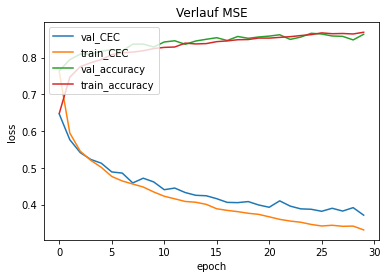

In [17]:
if (CODE_FUER_AUFGABE_5 == True):

  input_layer = Input (shape=(32, 32, 3))   # Input des Teilnetzes ist ein Bild 
                                              # mit 32 Zeile, 32 Spalten und 3 Byte je RGB-Pixel 
  # Alle hier aufgefuehrten Parameter sind im Skript erklaert. Die verwendten Namen sind "selbsterklaerend"
  ANZAHL_KERNELS          =   32                # Besser Neuronen pro Bildpunkt also ANZAHL_KERNELS
  ACTIVATION_FUNCTION     =   activations.relu
  KERNEL_ANZAHL_SPALTEN   =   6
  KERNEL_ANZAHL_ZEILEN    =   6
  STRIDE_HORIZONTAL       =   1
  STRIDE_VERTICAL         =   1
  DILATE_HORIZONTAL       =   1
  DILATE_VERTICAL         =   1

  ##################################################################################################
  #                          1b.)  Das trainierte Sub-Net laden
  ##################################################################################################
  # Die Netzwerktopology laden
  json_file = open(BASEDIR + '/Temp/' + 'feature_extraction.json', "r")
  loaded_feature_extraction = models.model_from_json(json_file.read())
  json_file.close()

  # Die Werte der Gewichte laden
  loaded_feature_extraction.load_weights(BASEDIR + '/Temp/' + 'feature_extraction.h5')

  ##################################################################################################
  #                       1c.)  Den Rest des Netzes definieren
  ##################################################################################################
  # Das soeben geladene Sub-Net kann nun wie ein "normaler" Layer bei der weiteren
  # Definition des Gesamtnetzes verwendet werden.
  sub_net_output = loaded_feature_extraction (input_layer) 

  #a.) das Sub-Net "hidden_layers_classification" aufgelöst wird, d.h. die darin enthaltenen Layer also direkt bei der Definition des Gesamtnetzes "normal" angegeben werden.

  flatten = layers.Flatten    (

                              )                             ( sub_net_output )


  dense_relu_1 = layers.Dense (       64,  
                                        activation=activations.relu,
                              )                             ( flatten )

  dropout3 = layers.Dropout(0.45)(dense_relu_1)


  output_layer = layers.Dense (       3,  
                                      activation=activations.softmax
                              )                             ( dropout3 )

  ####################################################################################################
  
  
  # Die Topolgie des Gesamtnetzes erzeugen
  aufgabe_5_cnn = models.Model( input_layer, output_layer)

  ####################################################################################################
  #                                   2.)  Compilieren
  ##################################################################################################
  # Als Optimierer waehlen wir wieder den Stochastic-Gradient-Descent
  # mit einer Lernrate von 0.001.
  # Der Parameter "momentum" ist im Kapitel "Deep-Learning - Spezielle Herausforderungen und Mechanismen" 
  # beschrieben.

  OPTIMIZER = optimizers.SGD(learning_rate=0.001, momentum=0.9)

  # Da wir ein "Wahrscheinlichkeitsaussage" statt einer "Ähnlichkeitsausssage" erhalten moechten
  # waehlen wir hier nun die Cross-Entropy-Cost-Function statt des Mean-Squared-Error als "Fehlermaß" (Loss)
  LOSSES = losses.CategoricalCrossentropy()  

  # Als Metric fuer die Evaluation waehlen wir (wie gehabt) die Accuracy 
  METRIC = metrics.CategoricalAccuracy()

  # Compilierung durchfuehren
  aufgabe_5_cnn.compile(optimizer=OPTIMIZER, loss=LOSSES, metrics=[METRIC])
  aufgabe_5_cnn.summary()


  ##################################################################################################
  #                                   3.)  Trainieren
  ##################################################################################################
  # Das Training geschieht so wie bisher auch schon.
  # Die Call-Backs sind heir jedoch deaktiviert
  batch_size  = 128  # Anzahl der Eingabevektoren je Mini-Batch
  max_epochs  = 30   # Anzahl der Epochen, die Trainiert werden soll

  history = aufgabe_5_cnn.fit(X_train_norm,                    # Eingabedaten  
                            y_train,                        # Ausagbedaten
                            epochs=max_epochs,              # Anzahl Epochen die trainiert werden soll
                            batch_size=batch_size,          # Batch-Size
                            #callbacks=[CustomCallback()],  # Angabe der Funktion, die nach jeder Epoche einmal aufgerufen wird
                            verbose=1,                      # Anzeige des Fortschrittsbalkens "====" je Eboche
                            validation_data=(X_test_norm, y_test) # Angabe der Validierunsgdaten
                                                                  # Die validierung wird automatisch nach jeder Epoche durchgefuehrt
                            )
      
  ##################################################################################################
  #                                   4.)  Evaluieren
  ##################################################################################################
  print(history.history.keys())     # Zeigt alle aufgezeichneten Datenkategorien an
                                      # Dies ist hilfreich um sehen zu koennen mit welchen Schluesselworten
                                      # (hier z.B. 'val_mean_squared_error' ) man das 
                                      # plt.plot(history.history[Schluesselwort]) "fuettern kann"

  # Anzeigen des Verlaufes des MSE auf den Validierungsdaten. In diesem Fall das Selbe wie der Loss Verlauf:
  plt.plot(history.history["val_loss"], label="val_CEC")
  plt.plot(history.history["loss"], label="train_CEC")
  plt.plot(history.history["val_categorical_accuracy"], label="val_accuracy")
  plt.plot(history.history["categorical_accuracy"], label="train_accuracy")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.title('Verlauf MSE')
  plt.legend(loc='upper left')
  plt.show()  

## Aufgabe 5
Erzeugen Sie von der Codes-Zelle aus Aufgabe 4 eine Kopie. Verändern Sie diese kopierte Code-Zelle in der Art, dass das Gesamtnetz de facto die gleiche Topologie hat wie bisher, dabei allerdings das in Aufgabe 4 gespeicherte und trainierte Sub-Net  "feature_extraction" wieder verwendet. Wie dies prinzipiell geht ist im Code zu "Ein zweite einfaches CNN auf Basis eines gespeicherten Sub-Net" aufgeführt.<br><br>

Testen Sie, dass  nach einem "Laufzeit neu starten" dieses Netzwerk auch dann noch korrekt ausgeführt wird, wenn nur die beiden Steuerparamenter DATEN_HANDLING und CODE_FUER_AUFGABE_5 auf True gesetzt sind (alle anderen auf False) <br><br>

Wie verhält sich das Gesamtnetz beim Training hinsichtlich der benötigten Anzahl von Epochen?<br>
Hiernach bitte Ihre Antwort eingeben:

Zu beobachten ist, dass das Netz nun schneller trainiert ist.
Es benötigt weniger Epochen um über einen Wert von 0.7 der val_categorical_accuraccy zu gelangen, der Aufwand zu trainieren wurde stark verringert.


## Aufgabe 6 
Parametrieren Sie den Bereich "Handling der Daten so um, dass nun "Vogel", "Rotwild", "Frosch" selektiert werden.<br><br>

Führen Sie nun den Code vom "Handling der Daten" und von Aufgabe 5 erneut aus.<br><br>

Wie verhält sich das Gesamtnetz beim Training hinsichtlich der benötigten Anzahl von Epochen?<br>

Hier bitte Ihre Antwort eingeben:

Das Netzwerk scheint sehr gut für die Selektierung von Tieren geeignet zu sein, da nach der Veränderung der selektierten Tiere auf "Rotwild", "Vogel", "Frosch" 
nach 1 Epoche:

Epoch 1/30
118/118 [==============================] - 2s 8ms/step <br> loss: 0.8916 - categorical_accuracy: 0.5580 <br> val_loss: 0.6462 - val_categorical_accuracy: 0.7640



nach 30 Epochen:

Epoch 30/30
118/118 [==============================] - 1s 5ms/step <br> loss: 0.5793 - categorical_accuracy: 0.7583 <br> val_loss: 0.6348 - val_categorical_accuracy: 0.7580

bereits eine sehr hohe Genauigkeit erreicht wird.


